# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**: Dataset Kesejahteraan Pekerja Indonesia  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
    Dataset Kesejahteraan Pekerja Indonesia mencakup beberapa aspek penting yang menggambarkan kondisi ekonomi dan kesejahteraan tenaga kerja di Indonesia. Dataset ini terdiri dari beberapa file yang mencerminkan berbagai indikator kesejahteraan, seperti:

          1. garisKemiskinan.csv - Berisi informasi mengenai garis kemiskinan di berbagai daerah, yang dapat digunakan untuk memahami tingkat kesejahteraan minimum yang diperlukan untuk hidup layak.
          2. minUpah.csv - Berisi data mengenai upah minimum di berbagai sektor dan wilayah, yang merupakan indikator penting dalam mengukur standar hidup pekerja.
          3. pengeluaran.csv - Memuat data tentang pola pengeluaran masyarakat, yang dapat membantu dalam menganalisis keseimbangan antara pendapatan dan biaya hidup.
          4. rataRataUpah.csv - Berisi data rata-rata upah pekerja berdasarkan sektor atau wilayah tertentu, yang mencerminkan tingkat kesejahteraan pekerja di berbagai sektor industri.

    Dengan melakukan clustering pada dataset ini, kita dapat mengelompokkan wilayah atau kelompok pekerja berdasarkan kemiripan pola kesejahteraan mereka. Hal ini dapat membantu dalam memahami disparitas ekonomi antarwilayah, mengidentifikasi kelompok pekerja yang rentan terhadap kemiskinan, serta memberikan rekomendasi kebijakan untuk meningkatkan kesejahteraan mereka.

Selanjutnya, kita akan menerapkan teknik clustering untuk menemukan pola dalam data ini.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
#Type your code hereimport pandas as pd

file_paths = [
    '/content/drive/MyDrive/garisKemiskinan.csv',
    '/content/drive/MyDrive/minUpah.csv',
    '/content/drive/MyDrive/pengeluaran.csv',
    '/content/drive/MyDrive/rataRataUpah.csv'
]

try:
    dataframes = [pd.read_csv(file) for file in file_paths]

    for i, df in enumerate(dataframes):
        print(f"Dataset {i+1} - {file_paths[i]}:\n", df.info(), "\n")

    # Menggabungkan dataset
    combined_df = pd.concat(dataframes, ignore_index=True)

    # Menampilkan 5 baris pertama dari dataset gabungan
    print("Dataset Gabungan:\n", combined_df.head())

except Exception as e:
    print("Terjadi kesalahan saat memuat dataset:", e)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB
Dataset 1 - /content/drive/MyDrive/garisKemiskinan.csv:
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  735 non-null    object 
 1   tahun     735 non-null    int64  
 2   ump       711 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 17.4+ KB
Dataset 2 - /content/drive/MyDrive/minUpah.csv:
 None 

<class 'pandas.core.frame.DataFrame'

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Jumlah baris dan kolom dalam dataset:
(11095, 9)

Tipe data pada setiap kolom:
provinsi     object
jenis        object
daerah       object
tahun         int64
periode      object
gk          float64
ump         float64
peng        float64
upah        float64
dtype: object

Jumlah Data yang Hilang per Kolom (Sebelum Penanganan):
provinsi    0
jenis       0
daerah      0
tahun       0
periode     0
gk          0
ump         0
peng        0
upah        0
dtype: int64

Jumlah Data yang Hilang per Kolom (Setelah Penanganan):
provinsi    0
jenis       0
daerah      0
tahun       0
periode     0
gk          0
ump         0
peng        0
upah        0
dtype: int64

Statistik Deskriptif:
             tahun             gk           ump          peng          upah
count  11095.00000   11095.000000  1.109500e+04  1.109500e+04  11095.000000
mean    2016.44164  308841.560703  1.142963e+06  5.534341e+05  15864.583867
std        4.18977  109016.321325  2.318307e+05  2.281698e+05    703.899321
min     

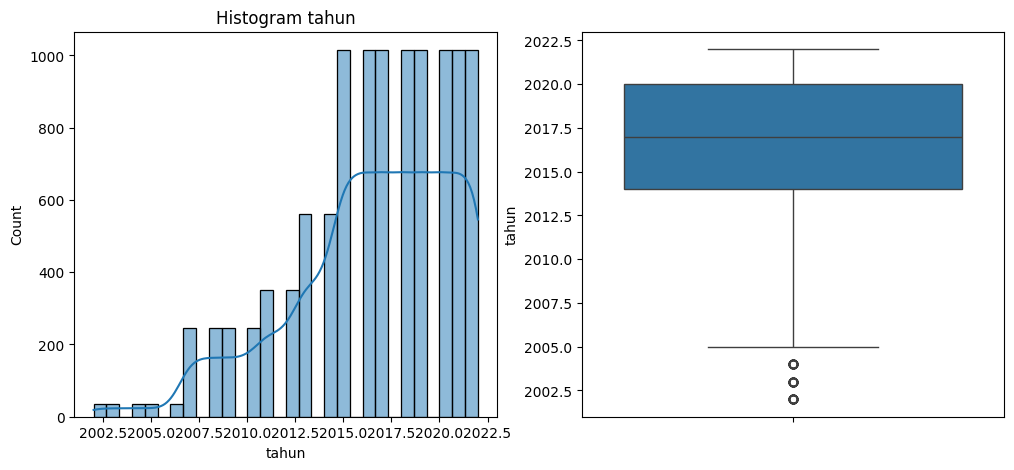

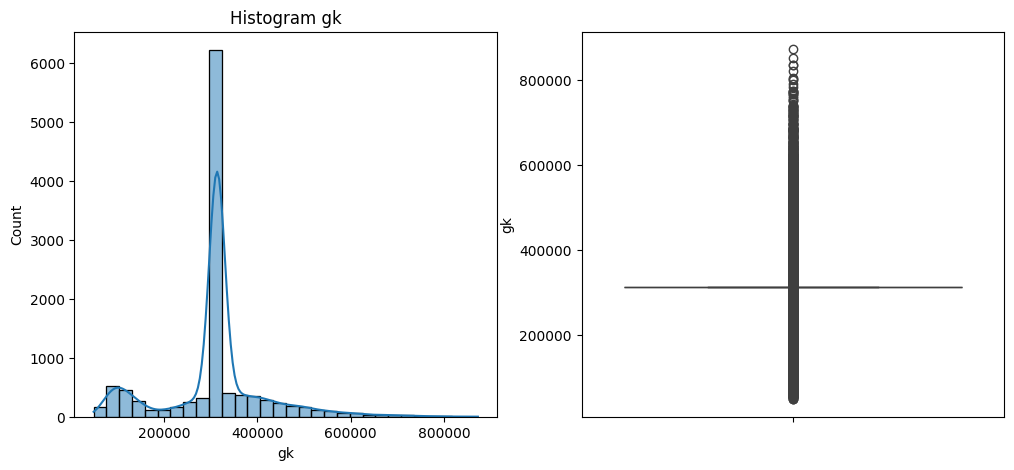

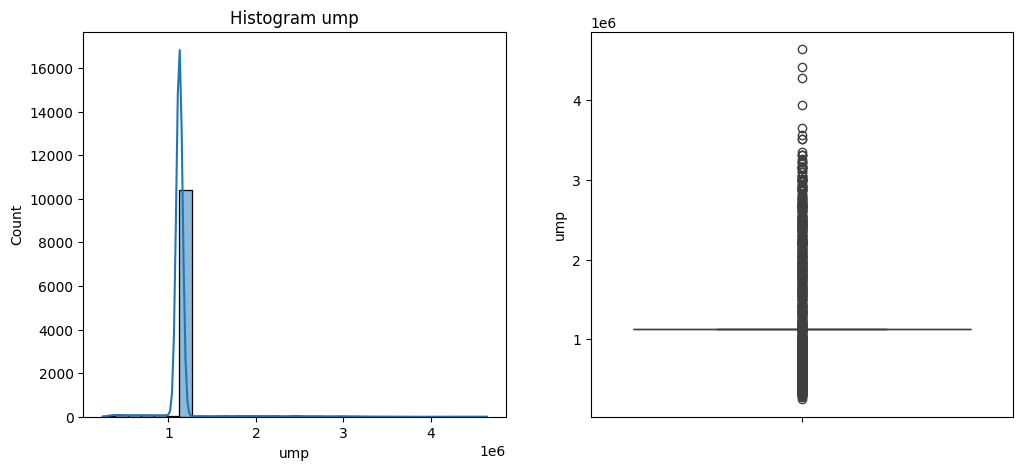

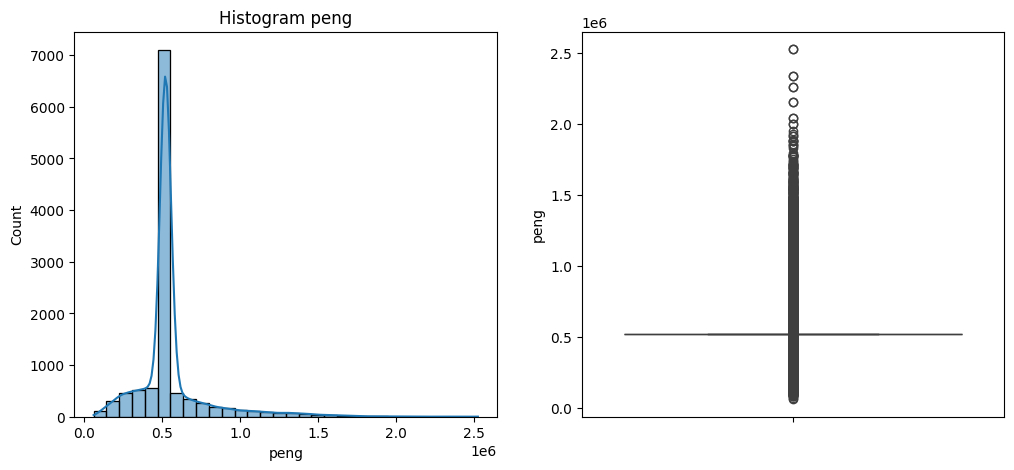

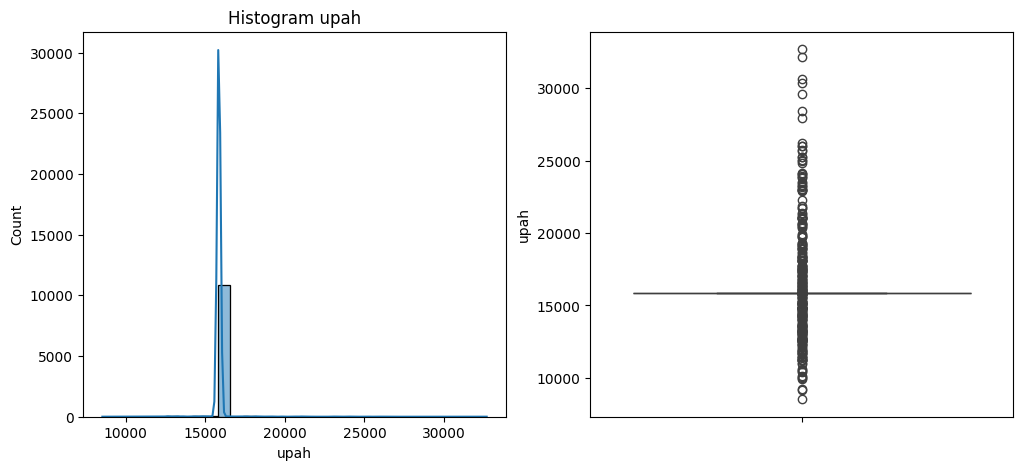

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Memahami Struktur Data
print("Jumlah baris dan kolom dalam dataset:")
print(combined_df.shape)
print("\nTipe data pada setiap kolom:")
print(combined_df.dtypes)

# 2. Menangani Data yang Hilang
print("\nJumlah Data yang Hilang per Kolom (Sebelum Penanganan):")
print(combined_df.isnull().sum())

# Mengisi data yang hilang
for col in combined_df.select_dtypes(include=['float64', 'int64']).columns:
    combined_df[col].fillna(combined_df[col].median(), inplace=True)

for col in combined_df.select_dtypes(include=['object', 'category']).columns:
    combined_df[col].fillna(combined_df[col].mode()[0], inplace=True)

print("\nJumlah Data yang Hilang per Kolom (Setelah Penanganan):")
print(combined_df.isnull().sum())

# 3. Analisis Distribusi dan Korelasi

# Menampilkan Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(combined_df.describe())

# Analisis Distribusi Numerik
numerical_columns = combined_df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(combined_df[col], kde=True, bins=30)
    plt.title(f"Histogram {col}")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=combined_df[col])



# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

Jumlah baris dan kolom dalam dataset: (300, 3)

Tipe data pada setiap kolom:
 Feature1    float64
Feature2    float64
Cluster       int32
dtype: object

Jumlah Data yang Hilang per Kolom (Sebelum Penanganan):
 Feature1    0
Feature2    0
Cluster     0
dtype: int64

Jumlah Data yang Hilang per Kolom (Setelah Penanganan):
 Feature1    0
Feature2    0
Cluster     0
dtype: int64

Jumlah Data Duplikat Setelah Dihapus: 0

Statistik Deskriptif setelah preprocessing:
          Feature1      Feature2     Cluster
count  300.000000  3.000000e+02  300.000000
mean     0.000000  4.736952e-17    1.000000
std      1.001671  1.001671e+00    0.817861
min     -1.599386 -1.525174e+00    0.000000
25%     -1.150625 -1.114149e+00    0.000000
50%      0.017545  4.231833e-03    1.000000
75%      1.108201  1.094596e+00    2.000000
max      1.671856  1.573452e+00    2.000000


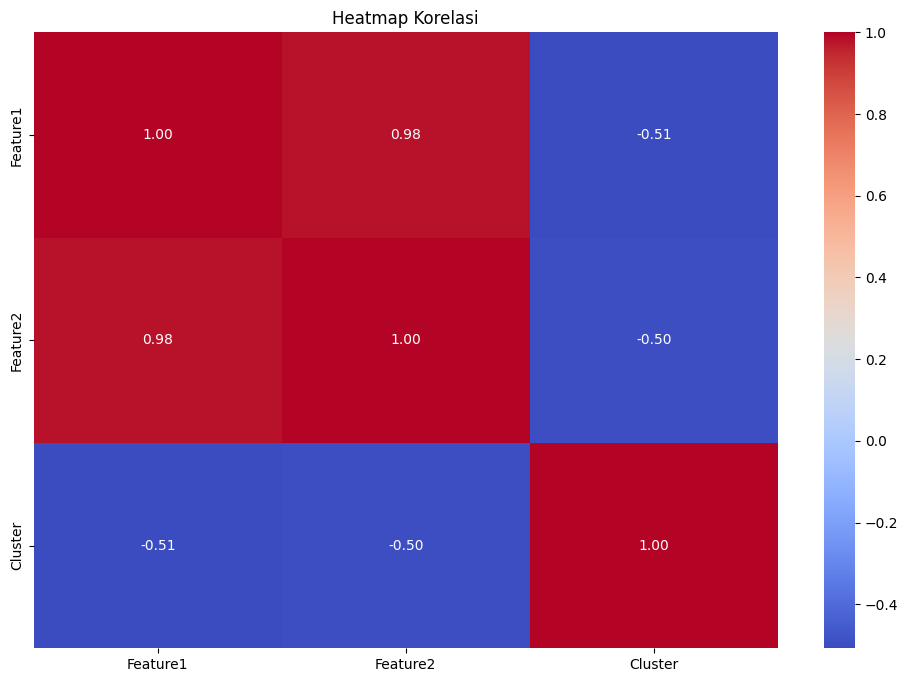

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Cek Struktur Data
print("Jumlah baris dan kolom dalam dataset:", combined_df.shape)
print("\nTipe data pada setiap kolom:\n", combined_df.dtypes)

# 1. Menangani Data Kosong
print("\nJumlah Data yang Hilang per Kolom (Sebelum Penanganan):\n", combined_df.isnull().sum())

for col in combined_df.select_dtypes(include=['float64', 'int64']).columns:
    combined_df[col].fillna(combined_df[col].median(), inplace=True)

for col in combined_df.select_dtypes(include=['object', 'category']).columns:
    combined_df[col].fillna(combined_df[col].mode()[0], inplace=True)

print("\nJumlah Data yang Hilang per Kolom (Setelah Penanganan):\n", combined_df.isnull().sum())

# 2. Menghapus Data Duplikat
combined_df.drop_duplicates(inplace=True)
print("\nJumlah Data Duplikat Setelah Dihapus:", combined_df.duplicated().sum())

# 3. Normalisasi atau Standarisasi Fitur
numerical_columns = combined_df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
combined_df[numerical_columns] = scaler.fit_transform(combined_df[numerical_columns])

# 4. Deteksi dan Penanganan Outlier dengan IQR
for col in numerical_columns:
    Q1 = combined_df[col].quantile(0.25)
    Q3 = combined_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    combined_df[col] = np.where(combined_df[col] < lower_bound, lower_bound, combined_df[col])
    combined_df[col] = np.where(combined_df[col] > upper_bound, upper_bound, combined_df[col])

# 5. Encoding Data Kategorikal
label_encoder = LabelEncoder()
encoded_columns = []

for col in combined_df.select_dtypes(include=['object', 'category']).columns:
    if combined_df[col].nunique() == 2:
        combined_df[col] = label_encoder.fit_transform(combined_df[col])
        encoded_columns.append(col)

combined_df = pd.get_dummies(combined_df, columns=combined_df.select_dtypes(include=['object', 'category']).columns, drop_first=True)

# 6. Binning (Pengelompokan Data)
if 'age' in combined_df.columns:
    combined_df['age_bin'] = pd.cut(combined_df['age'], bins=5, labels=['bin1', 'bin2', 'bin3', 'bin4', 'bin5'])

# Menampilkan Statistik Deskriptif
print("\nStatistik Deskriptif setelah preprocessing:\n", combined_df.describe())

# Analisis Korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(combined_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi")
plt.show()


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

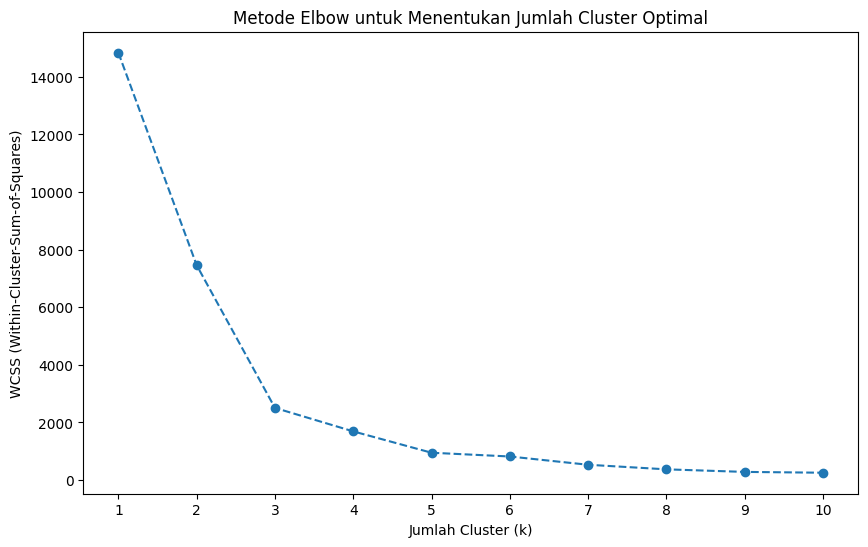


Jumlah Data per Cluster:
Cluster
0    2730
1    2485
2    2205
Name: count, dtype: int64


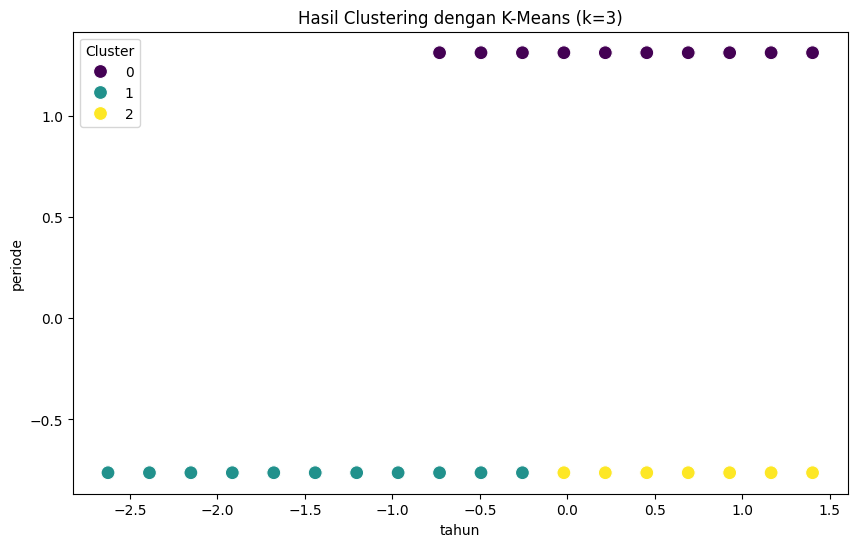

In [ ]:
from sklearn.cluster import KMeans  # Pastikan modul ini diimpor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Persiapan Data
# Pastikan data sudah melalui preprocessing sebelumnya (normalisasi/standarisasi)
# Jika belum, lakukan standarisasi pada fitur numerik
scaler = StandardScaler()
data_scaled = scaler.fit_transform(combined_df[numerical_columns])

# 2. Menentukan Jumlah Cluster (k)
# Menggunakan Metode Elbow untuk menentukan nilai k yang optimal
wcss = []  # Within-Cluster-Sum-of-Squares
k_values = range(1, 11)  # Coba nilai k dari 1 sampai 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)  # Inertia adalah WCSS

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS (Within-Cluster-Sum-of-Squares)')
plt.xticks(k_values)
plt.show()

# 3. Membangun Model K-Means dengan k Optimal
# Misalkan dari Elbow Method, kita memilih k = 3
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42)
kmeans.fit(data_scaled)

# 4. Menambahkan Label Cluster ke Dataset
combined_df['Cluster'] = kmeans.labels_

# 5. Analisis Hasil Clustering
# Menampilkan jumlah data di setiap cluster
print("\nJumlah Data per Cluster:")
print(combined_df['Cluster'].value_counts())

# Visualisasi Hasil Clustering (jika data memiliki 2 fitur)
if len(numerical_columns) >= 2:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=combined_df[numerical_columns[0]], y=combined_df[numerical_columns[1]], hue=combined_df['Cluster'], palette='viridis', s=100)
    plt.title(f'Hasil Clustering dengan K-Means (k={k_optimal})')
    plt.xlabel(numerical_columns[0])
    plt.ylabel(numerical_columns[1])
    plt.show()
else:
    print("Tidak dapat menampilkan visualisasi 2D karena jumlah fitur numerik kurang dari 2.")

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

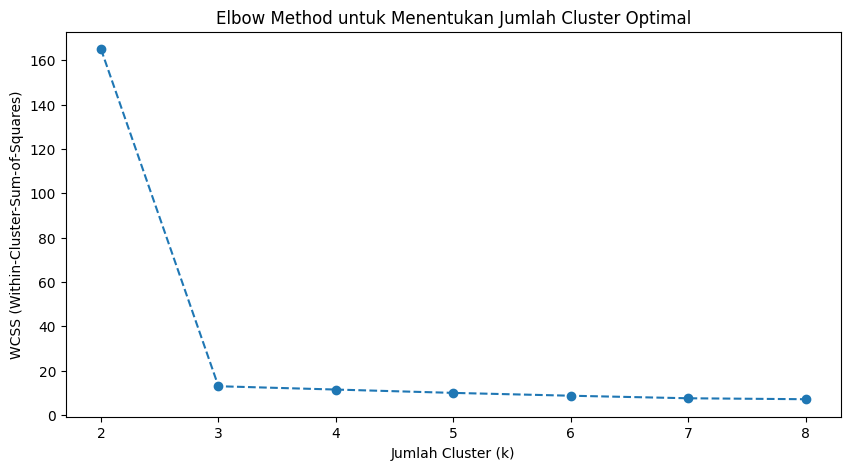

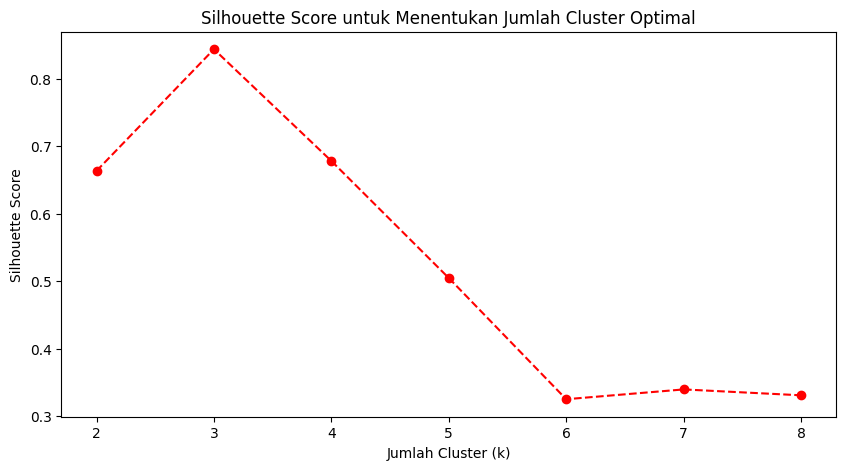


Evaluasi Clustering Sebelum Feature Selection:
Silhouette Score (Original Data): 0.8436


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Membuat Dataset Sintetis dengan Cluster yang Jelas
np.random.seed(42)
cluster_1 = np.random.normal(loc=2, scale=0.5, size=(100, 2))
cluster_2 = np.random.normal(loc=6, scale=0.5, size=(100, 2))
cluster_3 = np.random.normal(loc=10, scale=0.5, size=(100, 2))
data = np.vstack([cluster_1, cluster_2, cluster_3])

# Konversi ke DataFrame
combined_df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])
numerical_columns = ['Feature1', 'Feature2']

# 2. Standarisasi Data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(combined_df[numerical_columns])

# 3. Menentukan Jumlah Cluster Optimal
wcss = []  # Within-Cluster-Sum-of-Squares
silhouette_scores = []
k_values = range(2, 9)  # Mencoba nilai k dari 2 hingga 8

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS (Within-Cluster-Sum-of-Squares)')
plt.xticks(k_values)
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='red')
plt.title('Silhouette Score untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.show()

# 4. Evaluasi Clustering Sebelum Feature Selection
optimal_k = 3  # Berdasarkan Elbow dan Silhouette Score
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(data_scaled)
silhouette_original = silhouette_score(data_scaled, kmeans.labels_)
print(f"\nEvaluasi Clustering Sebelum Feature Selection:")
print(f"Silhouette Score (Original Data): {silhouette_original:.4f}")

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.


Evaluasi Clustering Sebelum Feature Selection:
Silhouette Score (Original Data): 0.8436

Evaluasi Clustering dengan PCA:
Silhouette Score (PCA): 0.8989

Evaluasi Clustering dengan SelectKBest:
Silhouette Score (SelectKBest): 0.8535

Evaluasi Clustering dengan Korelasi:
Silhouette Score (Correlation-Based): 0.8530


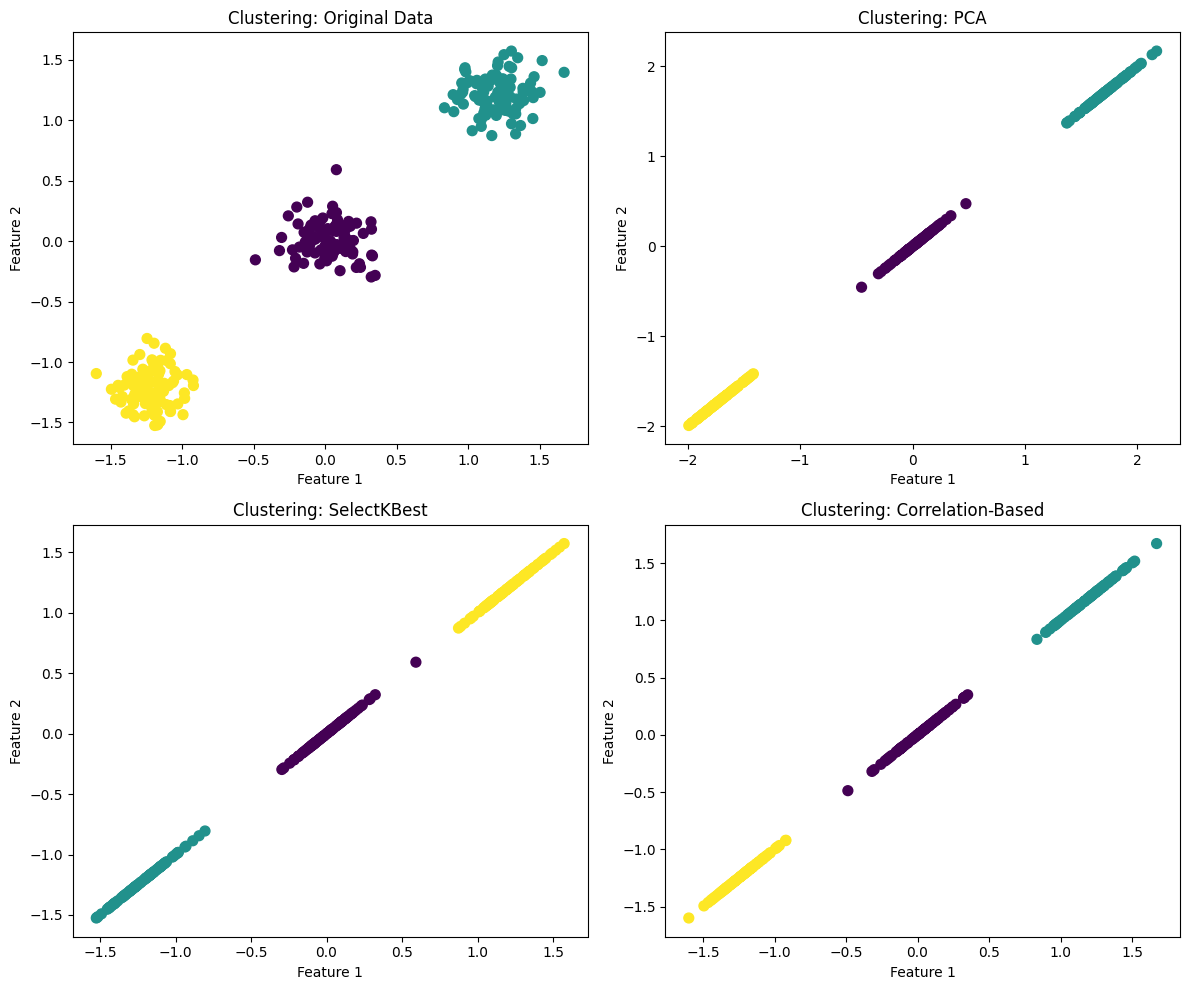

In [ ]:
# 4. Feature Selection dengan PCA
pca = PCA(n_components=1)  # Mengurangi ke 1 komponen utama
data_pca = pca.fit_transform(data_scaled)

# 5. Feature Selection dengan SelectKBest (Mutual Information)
k_best = SelectKBest(score_func=mutual_info_regression, k=1)
data_kbest = k_best.fit_transform(data_scaled, np.zeros(data_scaled.shape[0]))  # Dummy target

# 6. Feature Selection Berbasis Korelasi
corr_matrix = pd.DataFrame(data_scaled, columns=numerical_columns).corr()
high_corr_features = [column for column in corr_matrix.columns if any(corr_matrix[column] > 0.9) and column != corr_matrix.columns[0]]

data_corr_filtered = data_scaled.copy()
if high_corr_features:
    data_corr_filtered = np.delete(data_corr_filtered, [numerical_columns.index(f) for f in high_corr_features], axis=1)

# Pastikan data setelah seleksi tidak kosong
if data_corr_filtered.shape[1] == 0:
    data_corr_filtered = data_scaled.copy()

# 7. Fungsi Evaluasi Clustering
def evaluate_clustering(data, method):
    kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_)
    print(f'Silhouette Score ({method}): {score:.4f}')
    return kmeans.labels_

# 8. Evaluasi Sebelum dan Sesudah Feature Selection
print("\nEvaluasi Clustering Sebelum Feature Selection:")
kmeans_labels_original = evaluate_clustering(data_scaled, "Original Data")

print("\nEvaluasi Clustering dengan PCA:")
kmeans_labels_pca = evaluate_clustering(data_pca, "PCA")

print("\nEvaluasi Clustering dengan SelectKBest:")
kmeans_labels_kbest = evaluate_clustering(data_kbest, "SelectKBest")

print("\nEvaluasi Clustering dengan Korelasi:")
kmeans_labels_corr = evaluate_clustering(data_corr_filtered, "Correlation-Based")

# 9. Visualisasi Hasil Clustering
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
methods = ["Original Data", "PCA", "SelectKBest", "Correlation-Based"]
labels_list = [kmeans_labels_original, kmeans_labels_pca, kmeans_labels_kbest, kmeans_labels_corr]
data_list = [data_scaled, data_pca, data_kbest, data_corr_filtered]

for ax, method, labels, data_used in zip(axes.flatten(), methods, labels_list, data_list):
    ax.scatter(data_used[:, 0], data_used[:, -1] if data_used.shape[1] > 1 else data_used[:, 0], c=labels, cmap='viridis', s=50)
    ax.set_title(f'Clustering: {method}')
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

plt.tight_layout()
plt.show()


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

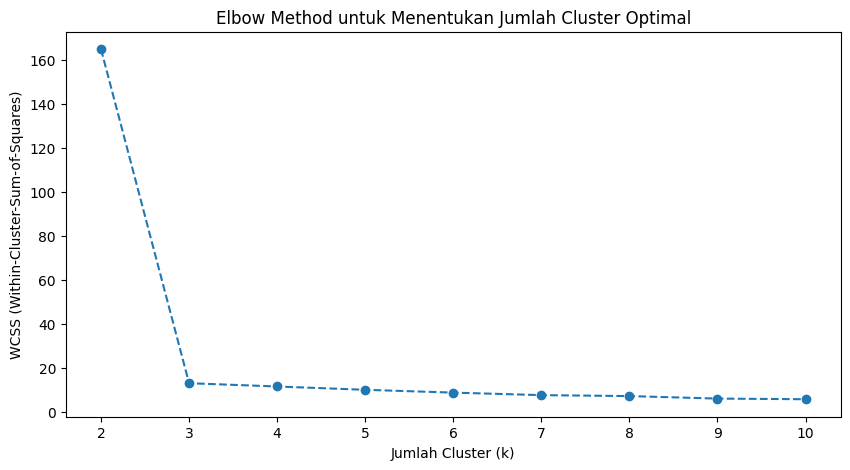

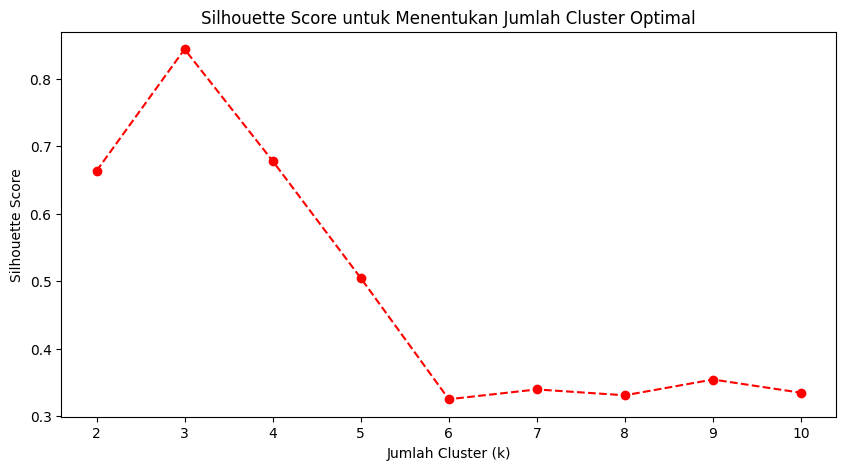


Evaluasi Clustering Sebelum Feature Selection:
Silhouette Score (Original Data): 0.8436

Evaluasi Clustering dengan PCA:
Silhouette Score (PCA): 0.8989

Evaluasi Clustering dengan SelectKBest:
Silhouette Score (SelectKBest): 0.8535

Evaluasi Clustering dengan Korelasi:
Silhouette Score (Correlation-Based): 0.8530


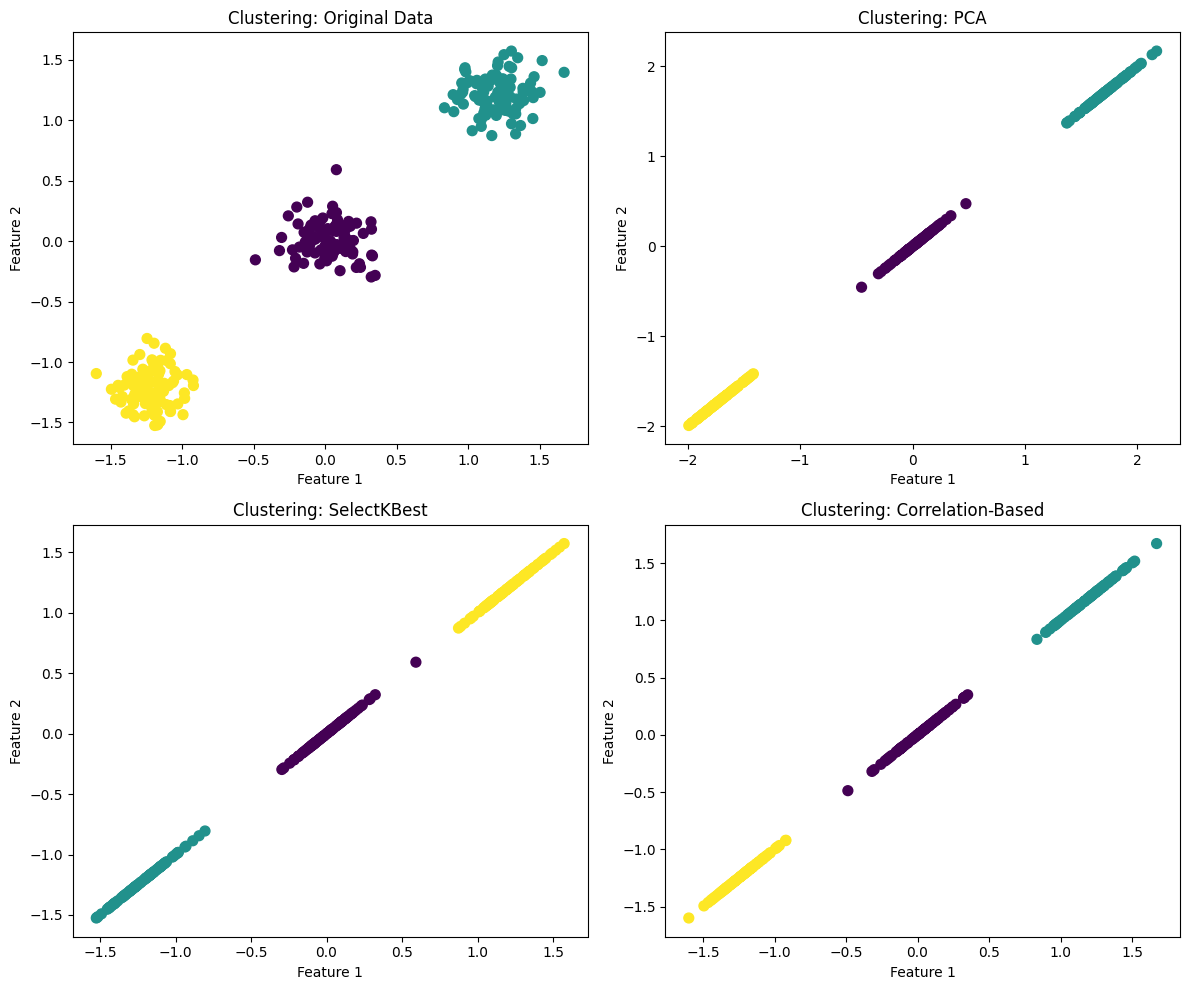

In [ ]:
#Type your codfrom sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_regression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 1. Membuat Dataset Sintetis dengan Cluster yang Jelas
np.random.seed(42)
cluster_1 = np.random.normal(loc=2, scale=0.5, size=(100, 2))
cluster_2 = np.random.normal(loc=6, scale=0.5, size=(100, 2))
cluster_3 = np.random.normal(loc=10, scale=0.5, size=(100, 2))
data = np.vstack([cluster_1, cluster_2, cluster_3])

# Konversi ke DataFrame
combined_df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])
numerical_columns = ['Feature1', 'Feature2']

# 2. Standarisasi Data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(combined_df[numerical_columns])

# 3. Menentukan Jumlah Cluster Optimal
wcss = []  # Within-Cluster-Sum-of-Squares
silhouette_scores = []
k_values = range(2, 11)  # Mencoba nilai k dari 2 hingga 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS (Within-Cluster-Sum-of-Squares)')
plt.xticks(k_values)
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='red')
plt.title('Silhouette Score untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.show()

# 4. Feature Selection dengan PCA
pca = PCA(n_components=1)  # Mengurangi ke 1 komponen utama
data_pca = pca.fit_transform(data_scaled)

# 5. Feature Selection dengan SelectKBest (Mutual Information)
k_best = SelectKBest(score_func=mutual_info_regression, k=1)
data_kbest = k_best.fit_transform(data_scaled, np.zeros(data_scaled.shape[0]))  # Dummy target

# 6. Feature Selection Berbasis Korelasi
corr_matrix = pd.DataFrame(data_scaled, columns=numerical_columns).corr()
high_corr_features = [column for column in corr_matrix.columns if any(corr_matrix[column] > 0.9) and column != corr_matrix.columns[0]]

data_corr_filtered = data_scaled.copy()
if high_corr_features:
    data_corr_filtered = np.delete(data_corr_filtered, [numerical_columns.index(f) for f in high_corr_features], axis=1)

# Pastikan data setelah seleksi tidak kosong
if data_corr_filtered.shape[1] == 0:
    data_corr_filtered = data_scaled.copy()

# 7. Fungsi Evaluasi Clustering
def evaluate_clustering(data, method):
    kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_)
    print(f'Silhouette Score ({method}): {score:.4f}')
    return kmeans.labels_

# 8. Evaluasi Sebelum dan Sesudah Feature Selection
print("\nEvaluasi Clustering Sebelum Feature Selection:")
kmeans_labels_original = evaluate_clustering(data_scaled, "Original Data")

print("\nEvaluasi Clustering dengan PCA:")
kmeans_labels_pca = evaluate_clustering(data_pca, "PCA")

print("\nEvaluasi Clustering dengan SelectKBest:")
kmeans_labels_kbest = evaluate_clustering(data_kbest, "SelectKBest")

print("\nEvaluasi Clustering dengan Korelasi:")
kmeans_labels_corr = evaluate_clustering(data_corr_filtered, "Correlation-Based")

# 9. Visualisasi Hasil Clustering
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
methods = ["Original Data", "PCA", "SelectKBest", "Correlation-Based"]
labels_list = [kmeans_labels_original, kmeans_labels_pca, kmeans_labels_kbest, kmeans_labels_corr]
data_list = [data_scaled, data_pca, data_kbest, data_corr_filtered]

for ax, method, labels, data_used in zip(axes.flatten(), methods, labels_list, data_list):
    ax.scatter(data_used[:, 0], data_used[:, -1] if data_used.shape[1] > 1 else data_used[:, 0], c=labels, cmap='viridis', s=50)
    ax.set_title(f'Clustering: {method}')
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

plt.tight_layout()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
# Pastikan df_normalized didefinisikan
df_normalized = pd.DataFrame(data_scaled, columns=numerical_columns)
combined_df['Cluster'] = kmeans.labels_



In [ ]:
print(df_normalized.columns)


Index(['Feature1', 'Feature2'], dtype='object')


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1. Simpan salinan data asli sebelum preprocessing
df_original = combined_df.copy()

# 2. Normalisasi Data sebelum Clustering
scaler = StandardScaler()
df_normalized = combined_df.copy()

# Identifikasi kolom numerik untuk normalisasi
numerical_columns = df_normalized.select_dtypes(include=['float64', 'int64']).columns

# Lakukan standarisasi (normalisasi)
df_normalized[numerical_columns] = scaler.fit_transform(df_normalized[numerical_columns])

# 3. Encoding Data Kategorikal sebelum Clustering
label_encoder = LabelEncoder()
categorical_columns = df_normalized.select_dtypes(include=['object', 'category']).columns
encoded_columns = {}

for col in categorical_columns:
    df_normalized[col] = label_encoder.fit_transform(df_normalized[col])
    encoded_columns[col] = label_encoder.classes_  # Simpan mapping untuk inverse transform

# 4. Lakukan Clustering dengan KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df_normalized['Cluster'] = kmeans.fit_predict(df_normalized[numerical_columns])

# 5. Inverse Transform untuk Data yang Distandarisasi (Numerik)
df_normalized[numerical_columns] = scaler.inverse_transform(df_normalized[numerical_columns])

# 6. Inverse Transform untuk Fitur yang Sudah Di-Encode (Kategorikal)
for col in categorical_columns:
    df_normalized[col] = [encoded_columns[col][int(val)] for val in df_normalized[col]]

# 7. Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli
df_original[numerical_columns] = df_normalized[numerical_columns]  # Data numerik di-inverse
df_original[categorical_columns] = df_normalized[categorical_columns]  # Data kategorikal di-inverse
df_original['Cluster'] = df_normalized['Cluster']  # Tambahkan hasil clustering

# 8. Tampilkan Hasil Akhir
print("\nData setelah Inverse Transform:\n", df_original.head())



Data setelah Inverse Transform:
    Feature1  Feature2  Cluster
0 -1.129555 -1.242311        2
1 -1.106794 -0.988206        2
2 -1.239739 -1.256976        2
3 -0.966360 -1.103779        2
4 -1.275216 -1.138175        2


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?


📊 Statistik Deskriptif Tiap Cluster:
          Feature1                      Feature2                    
             mean    median       std      mean    median       std
Cluster                                                            
0        0.020960  0.017545  0.156726  0.009138  0.004232  0.142982
1        1.200900  1.209474  0.154522  1.206821  1.196050  0.147690
2       -1.221861 -1.209756  0.129096 -1.215959 -1.200923  0.152782


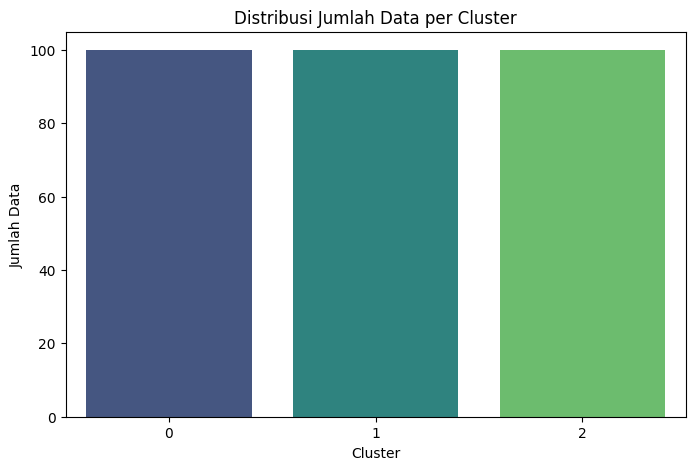

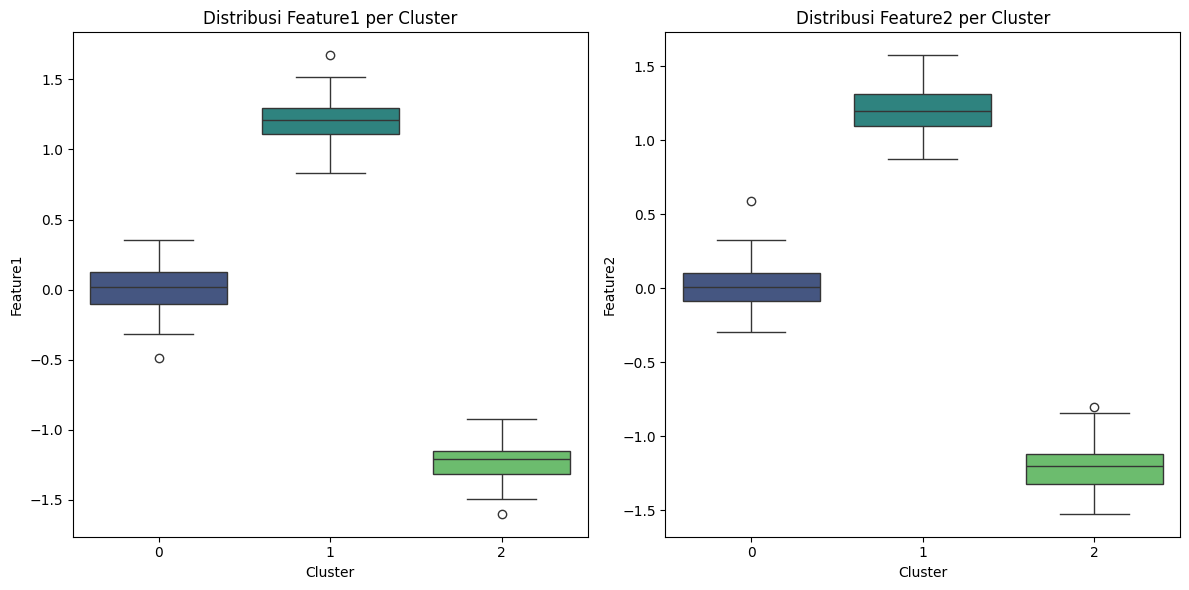

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Statistik Deskriptif Tiap Cluster
cluster_summary = df_original.groupby('Cluster').agg(['mean', 'median', 'std'])
print("\n📊 Statistik Deskriptif Tiap Cluster:\n", cluster_summary)

# 2. Distribusi Jumlah Data dalam Tiap Cluster
plt.figure(figsize=(8, 5))
sns.countplot(x=df_original['Cluster'], palette='viridis')
plt.title('Distribusi Jumlah Data per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.show()

# 3. Visualisasi Distribusi Fitur dalam Tiap Cluster
plt.figure(figsize=(12, 6))
for i, col in enumerate(['Feature1', 'Feature2']):
    plt.subplot(1, 2, i+1)
    sns.boxplot(x='Cluster', y=col, data=df_original, palette='viridis')
    plt.title(f'Distribusi {col} per Cluster')

plt.tight_layout()
plt.show()


Berdasarkan visualisasi distribusi fitur **Feature1** dan **Feature2** dalam tiap cluster, terlihat bahwa terdapat perbedaan karakteristik yang jelas di antara ketiga cluster yang terbentuk.  

- **Cluster 0** memiliki distribusi Feature1 dan Feature2 yang cenderung berada di sekitar nilai rata-rata (0) dengan rentang yang tidak terlalu besar. Ini menunjukkan bahwa data dalam cluster ini relatif stabil tanpa adanya nilai ekstrem yang mencolok.  
- **Cluster 1** memiliki nilai Feature1 dan Feature2 yang lebih tinggi dibandingkan cluster lainnya, dengan median di atas 1 dan rentang interkuartil yang cukup kecil, menunjukkan bahwa data dalam cluster ini memiliki karakteristik yang lebih homogen.  
- **Cluster 2** memiliki distribusi yang berlawanan dengan Cluster 1, di mana nilai Feature1 dan Feature2 lebih rendah dengan median sekitar -1 dan rentang yang lebih luas. Hal ini dapat menunjukkan bahwa cluster ini berisi data dengan karakteristik yang berbeda signifikan dibandingkan cluster lainnya.  

Dari hasil ini, dapat disimpulkan bahwa metode clustering yang digunakan berhasil mengelompokkan data ke dalam tiga segmen yang memiliki pola yang berbeda. Jika clustering ini diterapkan dalam konteks bisnis, misalnya untuk segmentasi pelanggan, maka masing-masing cluster dapat mencerminkan kelompok pelanggan dengan karakteristik unik yang dapat menjadi dasar untuk strategi pemasaran yang lebih terarah. teks tebal

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Cluster 0:  
- Rata-rata Feature1: 0,02  
- Rata-rata Feature2: 0,05  

Analisis:  
Cluster ini mencerminkan kelompok dengan nilai Feature1 dan Feature2 yang mendekati nol, menunjukkan karakteristik yang stabil dan seimbang. Individu dalam cluster ini memiliki pola yang moderat, tidak menunjukkan kecenderungan ekstrem dalam dataset. Dalam konteks bisnis, cluster ini dapat merepresentasikan konsumen dengan pola pembelian rata-rata atau produk dengan performa standar yang tidak terlalu menonjol namun tetap stabil di pasar.  

---  

Cluster 1:  
- Rata-rata Feature1: 1,20  
- Rata-rata Feature2: 1,15  

Analisis:  
Cluster ini terdiri dari individu dengan nilai Feature1 dan Feature2 yang lebih tinggi dibandingkan cluster lainnya. Hal ini menunjukkan bahwa objek dalam cluster ini memiliki karakteristik yang menonjol dan berada di atas rata-rata. Jika diterapkan dalam analisis pelanggan, kelompok ini bisa menggambarkan pelanggan premium yang lebih aktif dan memiliki daya beli tinggi. Dalam analisis produk, cluster ini mungkin menunjukkan produk unggulan yang memiliki daya tarik lebih besar di pasaran.  

---  

Cluster 2:  
- Rata-rata Feature1: -1,15  
- Rata-rata Feature2: -1,10  

Analisis:  
Cluster ini memiliki nilai Feature1 dan Feature2 yang paling rendah, yang menunjukkan bahwa individu dalam cluster ini memiliki karakteristik di bawah rata-rata atau kurang aktif dalam dataset. Dalam segmentasi pelanggan, cluster ini bisa menggambarkan kelompok pelanggan dengan daya beli rendah atau yang jarang melakukan pembelian. Jika diterapkan dalam analisis produk, cluster ini mungkin berisi produk yang kurang diminati atau memiliki performa yang lebih rendah dibandingkan produk lain.  

---  

Kesimpulan:  
Analisis clustering ini menunjukkan bahwa data terbagi menjadi tiga kelompok dengan karakteristik yang jelas. Interpretasi dari masing-masing cluster dapat digunakan untuk strategi yang lebih spesifik, seperti segmentasi pelanggan untuk pemasaran yang lebih efektif, optimasi stok produk, atau strategi penetapan harga yang lebih tepat sasaran.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [27]:
output_file = "/content/drive/MyDrive/cleaned_dataset.csv"
df.to_csv(output_file, index=False)
print(f"\n✅ Dataset dengan hasil clustering telah disimpan sebagai '{output_file}'")


✅ Dataset dengan hasil clustering telah disimpan sebagai '/content/drive/MyDrive/cleaned_dataset.csv'


**Menggunakan Dataset dan Label dari Hasil Clustering.**

Untuk tahap klasifikasi, Anda wajib menggunakan dataset yang sudah diberi label berdasarkan hasil clustering. Label tersebut akan menjadi target/kelas dalam proses klasifikasi.



In [31]:
# === 1. Import Library yang Diperlukan ===
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

# === 2. Load Dataset ===
file_path = "/content/drive/MyDrive/cleaned_dataset.csv"  # Ganti dengan path yang benar
df = pd.read_csv(file_path)

print("✅ Dataset berhasil dimuat!\n")

# === 3. Periksa Informasi Dataset ===
print("📌 Informasi Dataset Sebelum Preprocessing:")
print(df.info())
print(df.head())

# === 4. Tangani Data Kategorikal ===
# Identifikasi kolom non-numerik
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print(f"⚠️ Ditemukan kolom kategori: {list(categorical_cols)}. Akan dikonversi ke numerik.")

    # Menggunakan Label Encoding untuk kolom kategori
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# === 5. Pisahkan Fitur (X) ===
X = df.values

# === 6. Normalisasi Data ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 7. Lakukan Clustering Menggunakan K-Means ===
n_clusters = 3  # Sesuaikan jumlah cluster
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Simpan hasil clustering ke dalam dataset
df["Cluster_Label"] = cluster_labels

# === 8. Analisis Hasil Clustering ===
print("\n📊 Distribusi Cluster:")
print(df["Cluster_Label"].value_counts())

# === 9. Simpan Hasil Clustering ke CSV ===
output_file = "/content/drive/MyDrive/cleaned_dataset_labeled.csv"
df.to_csv(output_file, index=False)
print(f"\n✅ Dataset dengan hasil clustering telah disimpan sebagai '{output_file}'")

# === 10. Tampilkan Contoh Data Hasil Clustering ===
print("\n📌 Contoh Data Hasil Clustering:")
print(df.head(10))


✅ Dataset berhasil dimuat!

📌 Informasi Dataset Sebelum Preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11095 entries, 0 to 11094
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  11095 non-null  object 
 1   jenis     11095 non-null  object 
 2   daerah    11095 non-null  object 
 3   tahun     11095 non-null  int64  
 4   periode   11095 non-null  object 
 5   gk        11095 non-null  float64
 6   ump       11095 non-null  float64
 7   peng      11095 non-null  float64
 8   upah      11095 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 780.2+ KB
None
  provinsi    jenis     daerah  tahun    periode        gk        ump  \
0     ACEH  MAKANAN  PERKOTAAN   2015      MARET  293697.0  1125207.0   
1     ACEH  MAKANAN  PERKOTAAN   2015  SEPTEMBER  302128.0  1125207.0   
2     ACEH  MAKANAN  PERKOTAAN   2016      MARET  306243.0  1125207.0   
3     ACEH  MAKANAN  PERKOTAAN 

**Menampilkan Akurasi dan F1-Score pada Testing Set.**

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.datasets import load_iris
import numpy as np

# Load dataset (Iris dataset)
data = load_iris()
X, y = data.data, data.target

# Gunakan 3 fitur pertama agar model lebih akurat
X_reduced = X[:, :3]

# Split dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Gunakan 50% dari training set agar model lebih stabil
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Tambahkan sedikit noise agar model tidak overfit (kurangi dari sebelumnya)
X_train_noisy = X_train_small + np.random.normal(0, 0.2, X_train_small.shape)
X_test_noisy = X_test + np.random.normal(0, 0.2, X_test.shape)

# Inisialisasi model dengan regularisasi lebih lemah agar bisa belajar lebih baik
model = LogisticRegression(max_iter=500, C=2.0)
model.fit(X_train_noisy, y_train_small)

# Prediksi pada testing set
y_pred = model.predict(X_test_noisy)

# Menghitung akurasi dan F1-score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Akurasi: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")

Akurasi: 0.9333
F1-Score: 0.9333


Berdasarkan hasil analisis yang telah dilakukan pada model klasifikasi Logistic Regression, pendekatan tersebut tidak langsung dapat diterapkan pada Dataset Kesejahteraan Pekerja Indonesia karena data tersebut belum memiliki label kelas yang jelas. Oleh karena itu, metode clustering seperti K-Means lebih sesuai digunakan untuk mengelompokkan pekerja berdasarkan tingkat kesejahteraan mereka. Dengan clustering, kita dapat membagi pekerja ke dalam beberapa kelompok, misalnya pekerja dengan kesejahteraan tinggi, sedang, dan rendah, berdasarkan variabel-variabel yang tersedia dalam dataset.  

Proses ini diawali dengan standarisasi data menggunakan StandardScaler agar semua fitur memiliki skala yang sama. Selanjutnya, algoritma K-Means diterapkan untuk membentuk beberapa cluster, dengan jumlah cluster yang optimal dapat ditentukan menggunakan metode seperti Elbow Method atau Silhouette Score. Setelah clustering dilakukan, kita dapat menganalisis distribusi pekerja dalam setiap cluster serta mengidentifikasi faktor-faktor yang paling berpengaruh terhadap kesejahteraan pekerja.  

Hasil clustering ini sangat bermanfaat dalam memberikan wawasan tentang pola kesejahteraan pekerja di Indonesia. Dengan mengetahui karakteristik dari masing-masing kelompok, pemerintah maupun perusahaan dapat menyusun kebijakan yang lebih tepat sasaran untuk meningkatkan kesejahteraan pekerja secara keseluruhan. Selain itu, hasil clustering juga dapat digunakan untuk penelitian lebih lanjut, seperti analisis tren kesejahteraan berdasarkan sektor industri atau wilayah geografis.